In [13]:
import sys
import os



# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join( '..')))

In [14]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week 2\playstore-bank-reviews\data\bank_reviews_all_clean.csv', encoding='utf-8') 

In [15]:
print(df.head())

                                              review  rating        date bank  \
0  "Why don’t your ATMs support account-to-accoun...       4  2025-06-06  CBE   
1                        what is this app problem???       1  2025-06-05  CBE   
2       the app is proactive and a good connections.       5  2025-06-05  CBE   
3    I cannot send to cbebirr app. through this app.       3  2025-06-05  CBE   
4                                     not functional       1  2025-06-05  CBE   

  scrape_lang       source detected_language  
0          en  Google Play                en  
1          en  Google Play                en  
2          en  Google Play                en  
3          en  Google Play                en  
4          en  Google Play                en  


In [16]:
from src.sentiment_analyzer import get_vader_sentiment

df['vader_sentiment'] = df['review'].apply(get_vader_sentiment)

In [ ]:
from src.sentiment_analyzer import get_textblob_sentiment


df['textblob_sentiment'] = df['review'].apply(get_textblob_sentiment)

In [18]:
from src.sentiment_analyzer import add_sentiment_column
df = add_sentiment_column(df)


Device set to use cpu


In [19]:
# Show some example comparisons
print(df[['review', 'vader_sentiment', 'textblob_sentiment', 'distilbert_sentiment']].head(10))

# Calculate agreements (where DistilBERT prediction exists)
valid = df.dropna(subset=['distilbert_sentiment'])
agreement_vader = (valid['vader_sentiment'] == valid['distilbert_sentiment']).mean()
agreement_textblob = (valid['textblob_sentiment'] == valid['distilbert_sentiment']).mean()
print(f"VADER vs DistilBERT agreement: {agreement_vader:.2%}")
print(f"TextBlob vs DistilBERT agreement: {agreement_textblob:.2%}")

# Optional: See sentiment counts
print("\nVADER sentiment counts:\n", df['vader_sentiment'].value_counts())
print("\nTextBlob sentiment counts:\n", df['textblob_sentiment'].value_counts())
print("\nDistilBERT sentiment counts:\n", df['distilbert_sentiment'].value_counts())

                                              review vader_sentiment  \
0  "Why don’t your ATMs support account-to-accoun...        POSITIVE   
1                        what is this app problem???        NEGATIVE   
2       the app is proactive and a good connections.        POSITIVE   
3    I cannot send to cbebirr app. through this app.         NEUTRAL   
4                                     not functional         NEUTRAL   
5  everytime you uninstall the app you have to re...        POSITIVE   
6  it was good app but it have some issues like i...        POSITIVE   
7                                best app of finance        POSITIVE   
8                                   it is not safety        NEGATIVE   
9  it is like a childish app make it better the w...        NEGATIVE   

  textblob_sentiment distilbert_sentiment  
0           NEGATIVE             NEGATIVE  
1            NEUTRAL             NEGATIVE  
2           POSITIVE             POSITIVE  
3            NEUTRAL           

In [20]:
# Keep only rows where all three predictions exist
comp_df = df.dropna(subset=['vader_sentiment', 'textblob_sentiment', 'distilbert_sentiment'])

# VADER vs DistilBERT
agree_vader_distil = (comp_df['vader_sentiment'] == comp_df['distilbert_sentiment']).mean()
print(f"VADER vs DistilBERT agreement: {agree_vader_distil:.2%}")

# TextBlob vs DistilBERT
agree_textblob_distil = (comp_df['textblob_sentiment'] == comp_df['distilbert_sentiment']).mean()
print(f"TextBlob vs DistilBERT agreement: {agree_textblob_distil:.2%}")

# VADER vs TextBlob
agree_vader_textblob = (comp_df['vader_sentiment'] == comp_df['textblob_sentiment']).mean()
print(f"VADER vs TextBlob agreement: {agree_vader_textblob:.2%}")

VADER vs DistilBERT agreement: 66.19%
TextBlob vs DistilBERT agreement: 56.01%
VADER vs TextBlob agreement: 72.74%


In [21]:
print("VADER sentiment counts:\n", df['vader_sentiment'].value_counts())
print("\nTextBlob sentiment counts:\n", df['textblob_sentiment'].value_counts())
print("\nDistilBERT sentiment counts:\n", df['distilbert_sentiment'].value_counts())


VADER sentiment counts:
 vader_sentiment
POSITIVE    1639
NEUTRAL      606
NEGATIVE     594
Name: count, dtype: int64

TextBlob sentiment counts:
 textblob_sentiment
POSITIVE    1594
NEUTRAL      876
NEGATIVE     369
Name: count, dtype: int64

DistilBERT sentiment counts:
 distilbert_sentiment
POSITIVE    1497
NEGATIVE    1342
Name: count, dtype: int64


In [22]:
# Reviews where VADER and DistilBERT disagree
disagree_vader_distil = comp_df[comp_df['vader_sentiment'] != comp_df['distilbert_sentiment']]
print(disagree_vader_distil[['review', 'vader_sentiment', 'distilbert_sentiment']].head(10))

# Reviews where all three disagree
triple_disagree = comp_df[
    (comp_df['vader_sentiment'] != comp_df['textblob_sentiment']) &
    (comp_df['vader_sentiment'] != comp_df['distilbert_sentiment']) &
    (comp_df['textblob_sentiment'] != comp_df['distilbert_sentiment'])
]
print(triple_disagree[['review', 'vader_sentiment', 'textblob_sentiment', 'distilbert_sentiment']].head(10))

                                               review vader_sentiment  \
0   "Why don’t your ATMs support account-to-accoun...        POSITIVE   
3     I cannot send to cbebirr app. through this app.         NEUTRAL   
4                                      not functional         NEUTRAL   
5   everytime you uninstall the app you have to re...        POSITIVE   
6   it was good app but it have some issues like i...        POSITIVE   
12  this app has developed in a very good ways but...        POSITIVE   
16                                  Keep it up My CBE         NEUTRAL   
21                                 thankyou every one         NEUTRAL   
24                                       mortuary app         NEUTRAL   
25  it is smart app but it has stoped after some p...        POSITIVE   

   distilbert_sentiment  
0              NEGATIVE  
3              NEGATIVE  
4              NEGATIVE  
5              NEGATIVE  
6              NEGATIVE  
12             NEGATIVE  
16            

<Figure size 1000x400 with 0 Axes>

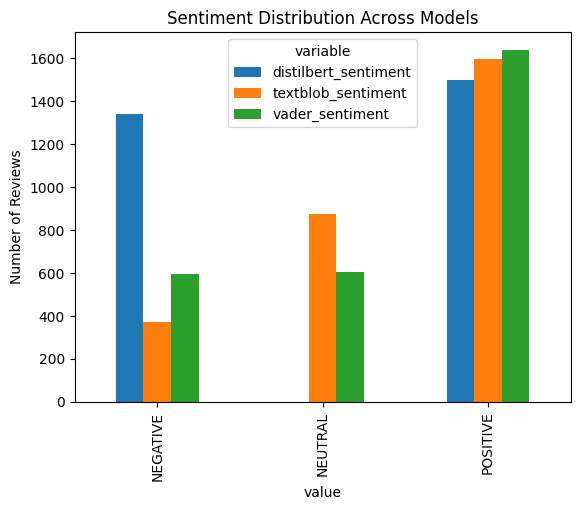

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
df[['vader_sentiment', 'textblob_sentiment', 'distilbert_sentiment']].melt().value_counts().unstack().T.plot(kind='bar')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution Across Models')
plt.show()

In [24]:
df.to_csv(r'C:\Users\ABC\Desktop\10Acadamy\week 2\playstore-bank-reviews\data\reviews_sentiment_comparison.csv', index=False, encoding='utf-8')
